The basic machine learning libray in Python is Scikit-learn

In this example we are going to create a sorting algorithm from handwritten digits


In [27]:
# Importing a database already present in scikit-learn
from sklearn import datasets

digits = datasets.load_digits()

print(digits.data.shape)
digits.data 

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [28]:
digits.target # solutions for each observation

array([0, 1, 2, ..., 8, 9, 8])

Why do we have 64 ?

In [29]:
# We have a table 8 rows and 8 columns
print(digits.images.shape)
digits.images[0]

(1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

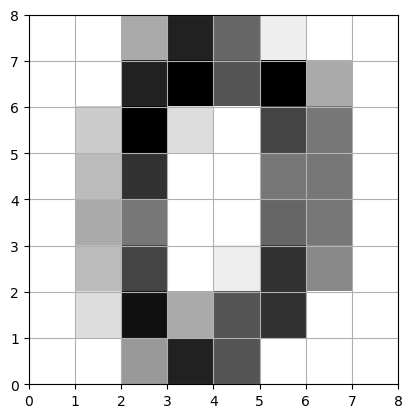

In [30]:
# Those data correspond to grey color variations
# Shown using matplotlib

import matplotlib.pyplot as plt

plt.style.use('default')
plt.grid()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest', extent=(0, 8, 0, 8))

For us the above image shows the number 0

For the computer this does not mean anything thats why we have a matrix

In our case we have 10 diffrent cases - one for each digit ; Hence multiple classes

2 ways of multi-class classification

1) (One-versus-One, OvO)

2) (One-versus-All, OvA ή One-versus-Rest, OvR)

For oVo --> (K 2)=K(K−1)/2 ( choose in statistics )

Each one of them can correspond to 2 classes

We measure the outcome of each classification for each class

The most frequent class is the correct one

see video for example

For OvR --> for K classes we create k classifications

We select the class that corresponds better 

see video for example

In [31]:
# Creating a classifier
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)

In [32]:
# Using fit for training
clf.fit(digits.data[:-1], digits.target[:-1]) 

SVC(C=100.0, gamma=0.001)

In [33]:
# Try the algorithm to check if able to predict digits
clf.predict(digits.data[-1:])

array([8])

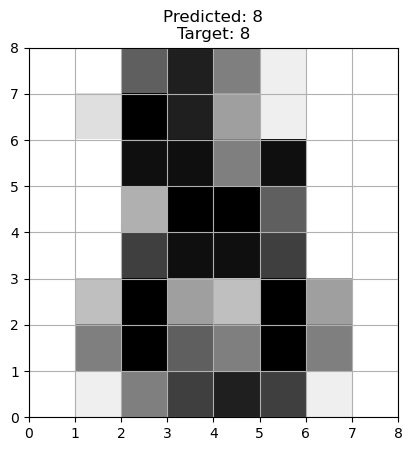

In [34]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, 
           interpolation='nearest', extent=(0, 8, 0, 8))
plt.grid()
_ = plt.title(f'Predicted: {clf.predict(digits.data[-1:])[0]}\nTarget: {digits.target[-1]}')

In summary

S1) CREATE OUR CLASSIFIER

S2) FIT

S3) PREDICT

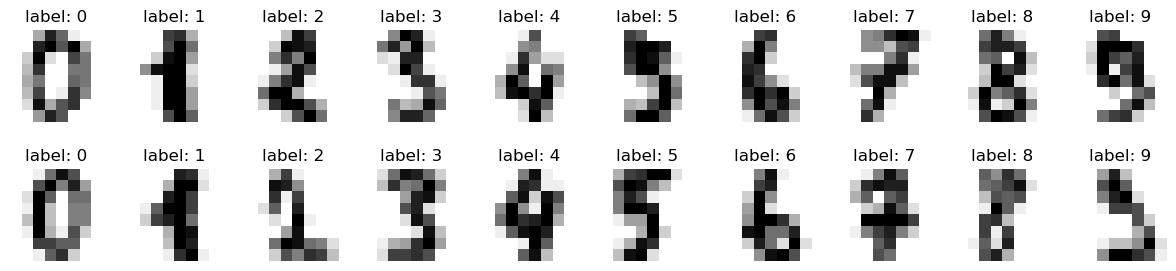

In [35]:
plt.figure(figsize=(10*1.5, 2*1.5))
images_and_labels = list(zip(digits.images, digits.target))
nrows, ncols = 2, 10
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(nrows, ncols, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'label: {label}')
plt.subplots_adjust(hspace=0.5)

In [36]:
# Creating a new classifier ( more lineant one)

classifier = svm.SVC(gamma=0.001)

In [37]:
# Using half digits for training
half_samples = len(digits.images) // 2

classifier.fit(digits.data[:half_samples], digits.target[:half_samples])

SVC(gamma=0.001)

In [38]:
# Other half for learning
expected = digits.target[half_samples:]
predicted = classifier.predict(digits.data[half_samples:])

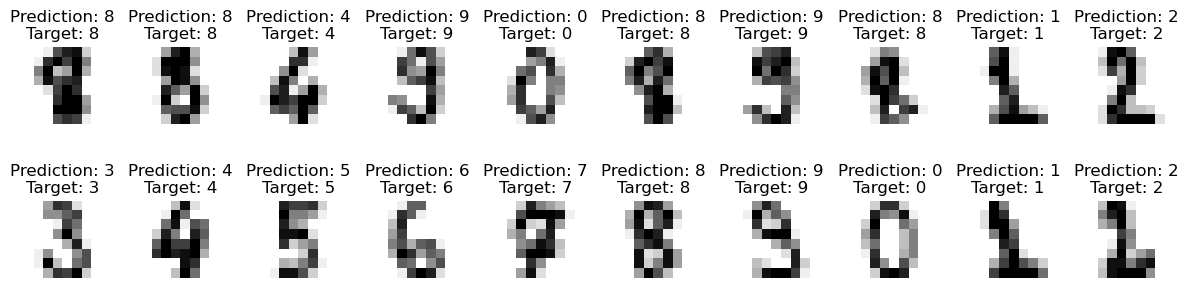

In [39]:
plt.figure(figsize=(10*1.5, 2*1.5))
images_predictions_targets = list(zip(digits.images[half_samples:], predicted, expected))
for index, (image, prediction, target) in enumerate(images_predictions_targets[:20]):
    plt.subplot(nrows, ncols, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\nTarget: {target}')
plt.subplots_adjust(hspace=1)

In [40]:
# Checking if our predictions are correct

from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In summary

S1) CREATE OUR CLASSIFIER

S2) FIT

S3) PREDICT

S4) CLASSIFICATION REPORT

Lets us take one by one the data in the table

Support is the number of tests in each class


    TP, True Positive, Αληθώς Θετικά
    TN, True Negative, Αληθώς Αρνητικά
    FP, False Positive, Ψευδώς Θετικά
    FN, False Negative, Ψευδώς Αρνητικά
    P, Positive, όλα τα θετικά στον πληθυσμό
    N, Negative, όλα τα αρνητικά τον πληθυσμό
    
    
Accuracy is the percentage of correct observations(test)

TP+TN / Sample Size

Using accuracy score

accuracy_score()

In [41]:
metrics.accuracy_score(expected, predicted)

0.9688542825361512

In [42]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



 97% accuracy
 
 Having more data will result to more accuracy

Precision:

This gives us the percentage of true positive with respect to alla positive predictions

TP/TP+FP=TP/All Positive Predictions

Using precision_score()

If we have sorted class we need to define average as None

In [43]:
metrics.precision_score(expected, predicted, average=None)

array([1.        , 0.98876404, 0.98837209, 0.97530864, 0.98876404,
       0.94623656, 0.98901099, 0.95652174, 0.93617021, 0.92783505])

In [44]:
metrics.precision_score(expected, predicted, average='macro') # Average

0.9696983376479764

In [45]:
metrics.precision_score(expected, predicted, average='weighted') # Weighted Average

0.9696092010839529

This can be useful if we our data are imbalanced between classes

In [46]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Recall:

Gives us the percentage of true positive with respect to all the postive which we should have predicted

TP      TP
TP+FN = P
 
Using 

recall_score() with the corresponding precision_score() parameter

In [47]:
print(metrics.recall_score(expected, predicted, average=None))
print(metrics.recall_score(expected, predicted, average='macro'))
print(metrics.recall_score(expected, predicted, average='weighted'))

[0.98863636 0.96703297 0.98837209 0.86813187 0.95652174 0.96703297
 0.98901099 0.98876404 1.         0.97826087]
0.9691763901507882
0.9688542825361512


In [48]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Why are those useful

For exmaple imagine that our data are seperated into 2 classes (positive and negative) and 99.99% are negative and 0.01% are positive

Then the classifier -> does not know any better that not saying all the time no , it will have 99.99% accuracy ==> Hence useless since he will say everytime negative

Such a classifier will have a TP = 0 hence accuracy and precison will be 0

But accuracy and precision do not measure the same thing

Example:

Using machine learning to identify potential terorist in airports

"
Ένας τέτοιος ταξινομητής όμως θα είχε TP=0

, άρα θα είχε ακρίβεια και ανάκληση μηδέν.

Από την άλλη, η ακρίβεια και η ανάκληση μετρούν διαφορετικά πράγματα.

Αν φτιάξουμε έναν πολύ αυστηρό ταξινομητή που εντοπίζει μόνο ένα ορθώς θετικό δείγμα, η ακρίβεια θα είναι 100% γιατί TP=1
και FP=0

, αλλά η ανάκληση θα είναι αβυσσαλέα.

Αν φτιάξουμε έναν πολύ επιεική ταξινομητή που τα βγάζει όλα θετικά, η ανάκληση θα είναι 100% γιατί FN=0
, αλλά η ακρίβεια θα είναι αβυσσαλέα.
"

F-1 in the table:

Combines acuracy and precision

In mathematics we call int harmonic mean == n / (∑1/x_i)

F1=2⋅(1 / 1/precision+ 1/recall)=2⋅precision⋅recall / precision+recall

Note:

We are using F1 instead of a normal average because F1 takes into account the outliers


In [49]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


In the first row we can see that from the data given corresponds to the digit 0

87 were succesfull but 1 of them was understood as digit 4

and so on...

In [67]:
_ = metrics.ConfusionMatrixDisplay.from_estimator(classifier,
                                                  digits.data[half_samples:], 
                                                  digits.target[half_samples:])

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'



    Προσέξτε κάτι: και στην στατιστική μπορούμε (όπως είδαμε) να προβλέψουμε τιμές με βάση τα δεδομένα μας.

    Στην στατιστική ο σκοπός μας όμως είναι άλλος: να εξηγήσουμε τα δεδομένα μας, φτιάχνοντας ένα μοντέλο.

    Το μοντέλο το αποτιμούμε χρησιμοποιώντας στατιστικούς ελέγχους.

    Στη Μηχανική Μάθηση, ο σκοπός μας δεν είναι να εξηγήσουμε τα δεδομένα μας. Είναι να τα χρησιμοποιήσουμε για να κάνουμε προβλέψεις.

    Εξού και οι μετρικές που χρησιμοποιούμε για την αξιολόγηση των αποτελεσμάτων μας.

